In [348]:
#Import libraries


import pandas as pd
import numpy as np
import seaborn as sns

import re

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('bmh')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None


In [349]:
#read the csv into a pandas dataframe

df = pd.read_csv(r'C:\Users\mikep\OneDrive\Documents\movies.csv')

In [350]:
#Take a quick peak at the dataframe

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [351]:
#Check for NAs or missing items


for col in df.columns:
    perc_miss = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, perc_miss))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [352]:
#Check the number of columns and rows

df.shape

(7668, 15)

In [353]:
# Check the datatypes of each column

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [354]:
# Here I check if there are any duplicate values.

dropped = df
dropped.drop_duplicates()
print("Before dropping duplicates - {}\nAfter dropping duplicates - {}".format(df.shape,dropped.shape))


#This shows there are no duplicates, so I will stick with the original dataframe.

Before dropping duplicates - (7668, 15)
After dropping duplicates - (7668, 15)


In [355]:
#Here I drop NA values and show the difference in shape of the dataframe before dropping them and after.


df = df.dropna()
print("Before dropping NA values - {}\nAfter dropping NA values - {}".format(dropped.shape, df.shape))

Before dropping NA values - (7668, 15)
After dropping NA values - (5421, 15)


In [356]:
# Cast the columns that don't need a decimal point as integers.

df['budget'] = df['budget'].astype('int64')
df['votes'] = df['votes'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [357]:
# Check that the datatypes were correctly changed.

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime       int64
dtype: object

In [358]:
# I want to take a look at the movies sorted based on how much money they made, 
# with the highest grossing films at the top.

df.sort_values(by = ['gross'], ascending = False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149


In [359]:
# Here I make it so that pandas defaults to showing all the data and not just the first and last few items.

pd.set_option('display.max_rows', None)

In [360]:
#  Using regex, I pull the release year out of the date and into a list.


released_series = pd.Series(data = pd.Series(df.released), dtype = 'int64')

year_list = []
for col in released_series:
    result = re.search('[0-9]{4}', col)
    year_list.append(int(result[0]))

In [361]:
# Here I put the year column into a list.

year_series = pd.Series(data = pd.Series(df.year), dtype = 'int64')
listed_years = year_series.values.tolist()

In [362]:
#This will check if there are any mismatches in the year that each movie was released.
#It will also put the mismatched years into a list, to be counted later on.

mismatched_list = []

index = 0
for n in listed_years:
    if n != year_list[index]:
        mismatched_list.append(n)
        if np.isnan(year_list[index]) == True:
            print("{} is not a number".format(year_list[index]))
    index += 1

In [363]:
#Now I count how many mismatches there are.

print("There are {} mismatched years.".format(len(mismatched_list)))

There are 708 mismatched years.


In [364]:
# The release year is the year that I want, so I will be replacing the year column
# with the year I pulled from the release date column using regex.
#I will also be making sure that none of my changes introduced any errors.


correct_year_df = pd.Series(data = year_list)
df['year'] = correct_year_df.values
index = 0
for v in df['year'].values:
    if np.isnan(v) == True:
        print(index)
    index += 1

df['year'] = df['year'].astype('int64')

In [365]:
#Check to make sure the changes are in place.  Earlier I noticed that index #8, Superman, previously 
#had a mismatched year.  Now the year is accurate to the release year.

df.head(9)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000,39754601,Paramount Pictures,95
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000,John Landis,Dan Aykroyd,John Belushi,United States,27000000,115229890,Universal Pictures,133
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000,23402427,Chartoff-Winkler Productions,129
8,Superman II,PG,Action,1981,"June 19, 1981 (United States)",6.8,101000,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000,108185706,Dovemead Films,127


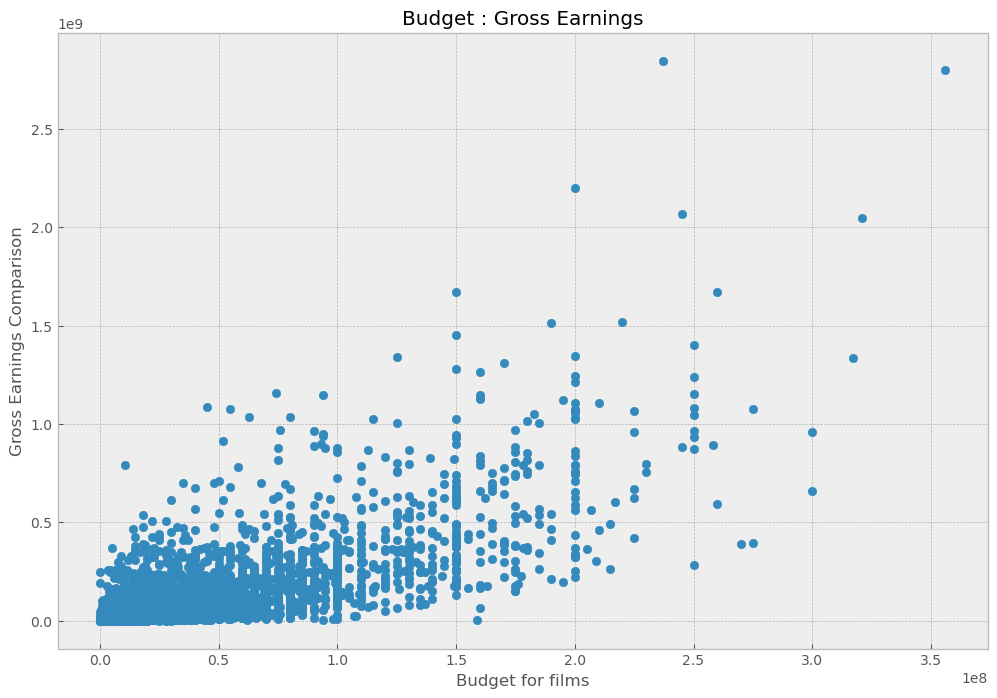

In [366]:
# Here I plot budget and gross earnings to see if there is a correlation.


plt.scatter(x = df['budget'], y = df['gross'])
plt.title("Budget : Gross Earnings")
plt.xlabel('Budget for films')
plt.ylabel('Gross Earnings Comparison')
plt.show()

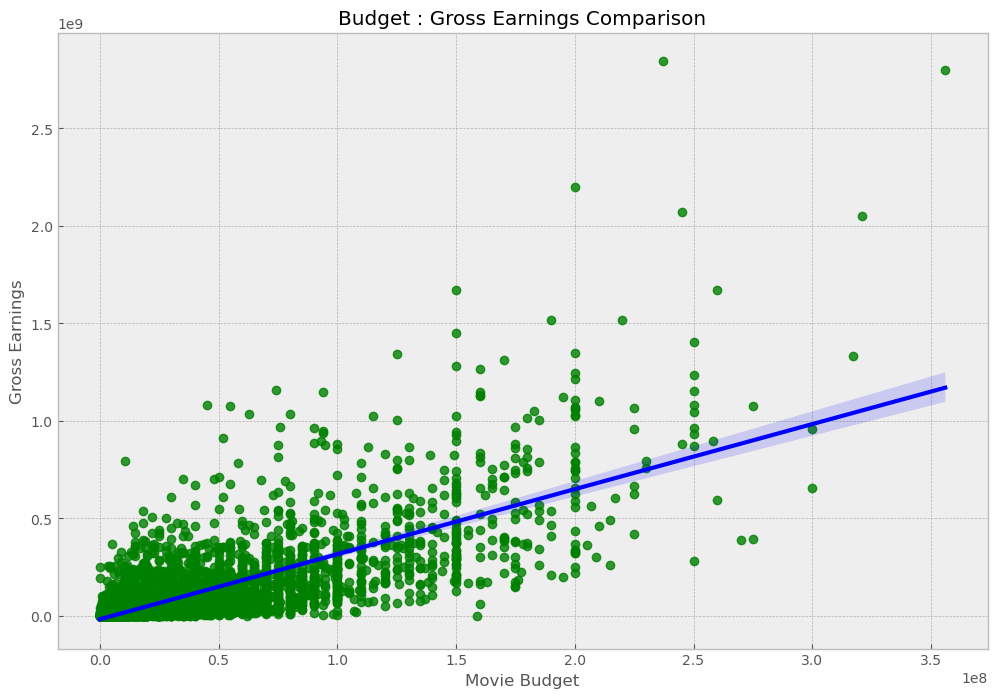

In [367]:
# I saw a correlation in the previous plot, so now I create a regression plot to 
# visualize in more detail how correlated the budget and gross earnings are.


sns.regplot(x = 'budget', y = 'gross', data = df, scatter_kws = {'color': 'green'}, line_kws = {'color': 'blue'})

plt.title('Budget : Gross Earnings Comparison')
plt.xlabel('Movie Budget')
plt.ylabel('Gross Earnings')
plt.show()


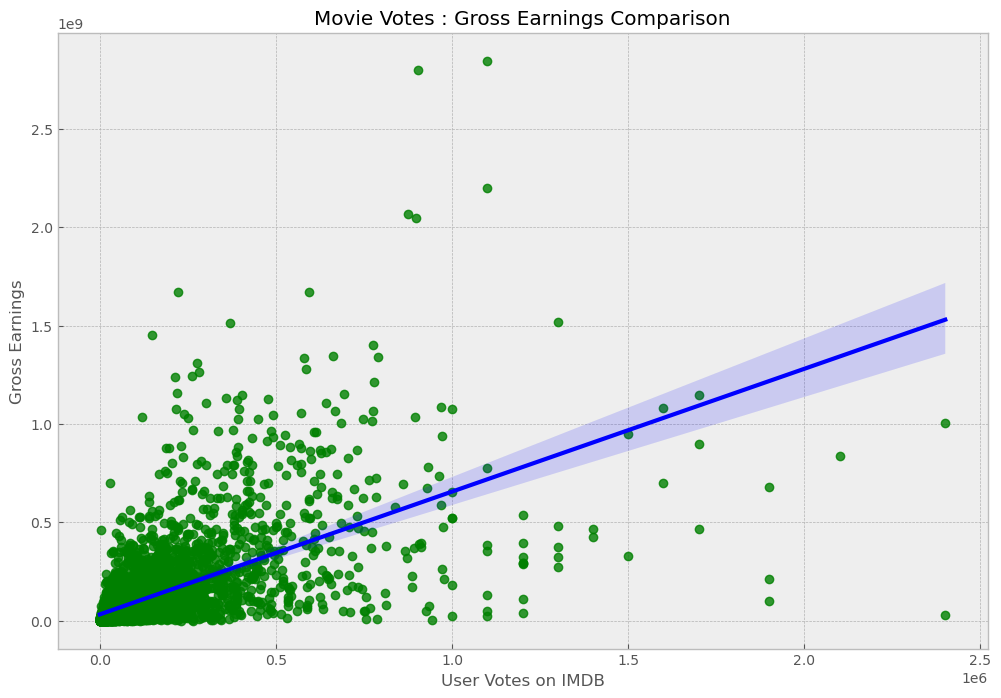

In [368]:
sns.regplot(x = 'votes', y = 'gross', data = df, scatter_kws = {'color': 'green'}, line_kws = {'color': 'blue'})

plt.title('Movie Votes : Gross Earnings Comparison')
plt.xlabel('User Votes on IMDB')
plt.ylabel('Gross Earnings')
plt.show()


In [369]:
# I want to see where the correlations happen between numeric values in the dataset.

df.corr()  #this is the pearson method(also the default) of determining level of correlation.

# I see a high correlation between gross and votes, and gross and budget.

,year,score,votes,budget,gross,runtime
year,1.000000,0.061923,0.203098,0.320312,0.268721,0.075294
score,0.061923,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.203098,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.320312,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.268721,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075294,0.414068,0.352303,0.318695,0.275796,1.000000


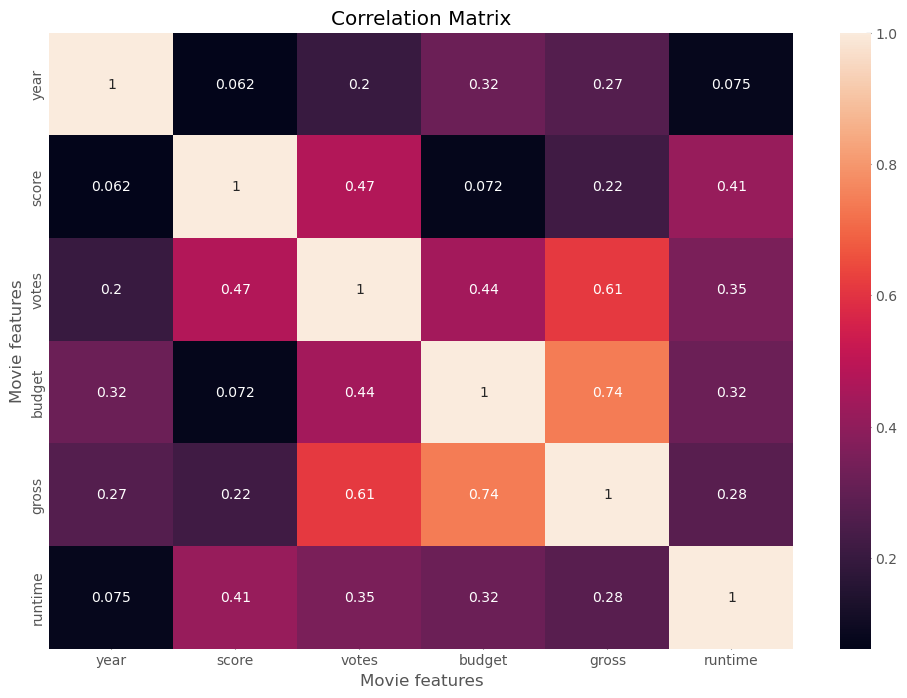

In [370]:
# Here I visualize the correlations between each numeric item to show the correlations through color.
# The brighter the color, the higher the correlation.  The Boxes in white with the number 1
# can be ignored because the matrix is showing comparison of the same features.


correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation Matrix')
plt.xlabel('Movie features')
plt.ylabel('Movie features')
plt.show()



In [371]:
# Again I show the data types because the object data types can be represented numerically.

df_numerized.dtypes

name          int16
rating         int8
genre          int8
year          int64
released      int16
score       float64
votes         int64
director      int16
writer        int16
star          int16
country        int8
budget        int64
gross         int64
company       int16
runtime       int64
dtype: object

In [372]:
df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


In [373]:
#We can create a numeric representation for each company name.  
#That way, we can include it in the correlation matrix.

df_numerized = df

for col in df_numerized.columns:
    if df_numerized[col].dtype == 'object':
        df_numerized[col] = df_numerized[col].astype('category')
        df_numerized[col] = df_numerized[col].cat.codes
df_numerized.head()
    

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,4692,6,6,1980,1304,8.4,927000,1795,2832,699,46,19000000,46998772,1426,146
1,3929,6,1,1980,1127,5.8,65000,1578,1158,214,47,4500000,58853106,452,104
2,3641,4,0,1980,1359,8.7,1200000,757,1818,1157,47,18000000,538375067,945,124
3,204,4,4,1980,1127,7.7,221000,889,1413,1474,47,3500000,83453539,1108,88
4,732,6,4,1980,1170,7.3,108000,719,351,271,47,6000000,39846344,1083,98


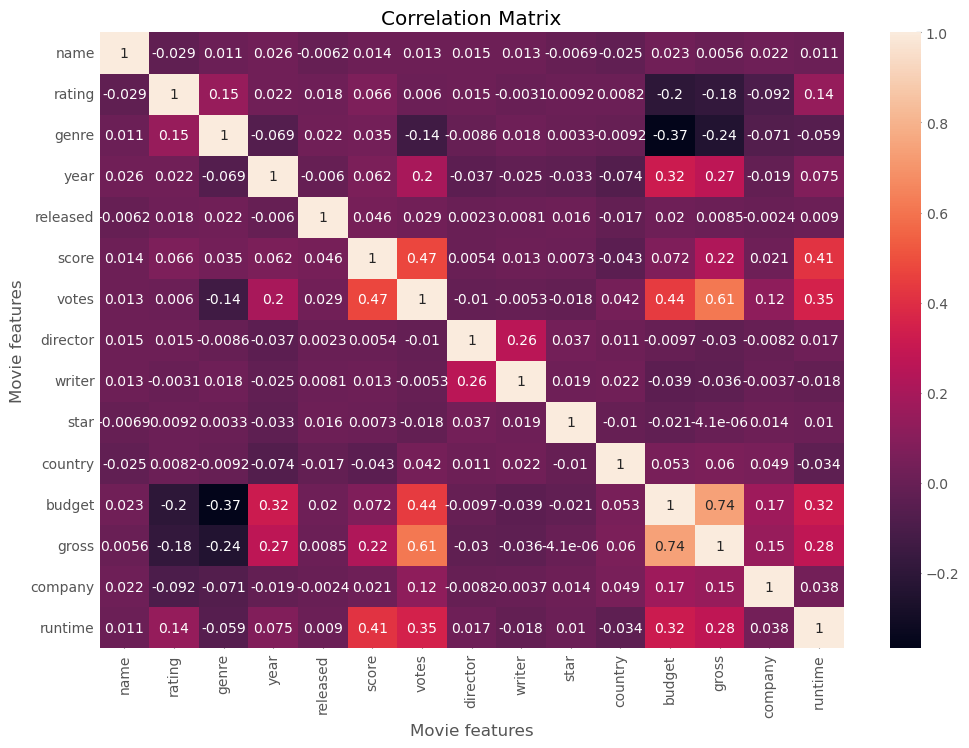

In [374]:
# Now I create a heatmap of all the columns(including those that are now being represented numerically)
# The heatmap shows that the name, genre, director, writer, star, country, and company DO NOT have
# a high correlation with score or gross earnings.

correlation_matrix = df_numerized.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation Matrix')
plt.xlabel('Movie features')
plt.ylabel('Movie features')
plt.show()

In [375]:
# Now I list out which columns have a high correlation with each other.


corr_mat = df_numerized.corr()
corr_pairs = corr_mat.unstack()
sorted_pairs = corr_pairs.sort_values()
sorted_pairs = sorted_pairs[(sorted_pairs) > 0.5]
sorted_pairs = sorted_pairs[(sorted_pairs) != 1]
sorted_pairs

# This shows that the only highly correlated columns are votes and gross earnings, and budget and gross earnings.

votes   gross     0.614751
gross   votes     0.614751
        budget    0.740247
budget  gross     0.740247
dtype: float64

In [346]:
# IMDB User votes and budget have the highest correlation to gross earnings.
# Company has low correlation to gross earnings.